Games EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # Importamos matplotlib.pyplot y seaborn para realizar graficos
import seaborn as sns


In [2]:
df_games = pd.read_parquet(r'../Data/clean_games_steam.parquet.gzip') # Leemos el archivo
df_games.head() #Damos un vistazo rapido de los juegos


,publisher,genres,app_name,title,price,early_access,id,developer,year
88310,Kotoshiro,Action,lost summoner kitty,Lost Summoner Kitty,4.99,0.0,761140.0,Kotoshiro,2018
88310,Kotoshiro,Casual,lost summoner kitty,Lost Summoner Kitty,4.99,0.0,761140.0,Kotoshiro,2018
88310,Kotoshiro,Indie,lost summoner kitty,Lost Summoner Kitty,4.99,0.0,761140.0,Kotoshiro,2018
88310,Kotoshiro,Simulation,lost summoner kitty,Lost Summoner Kitty,4.99,0.0,761140.0,Kotoshiro,2018
88310,Kotoshiro,Strategy,lost summoner kitty,Lost Summoner Kitty,4.99,0.0,761140.0,Kotoshiro,2018


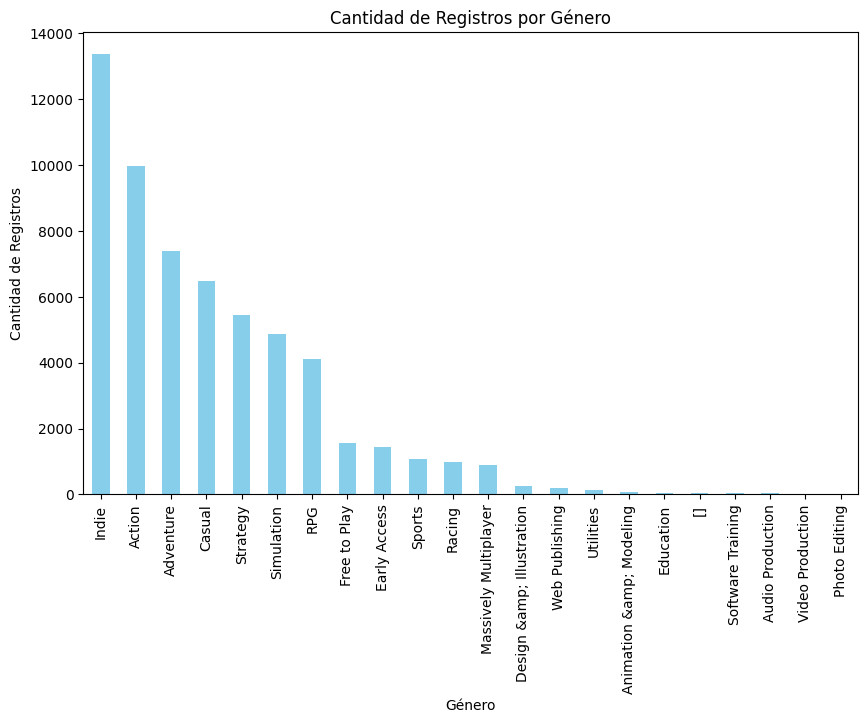

In [3]:
plt.figure(figsize=(10, 6))

conteo_genero = df_games['genres'].value_counts().sort_values(ascending=False) # Ordenamos la cantidad de generos de mayor a menor
conteo_genero.plot(kind='bar',color='skyblue') #Graficamos el barplot

plt.xlabel('Género')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Género')

plt.show()


Podemos ver que realmente hay muchos generos que tienen pocos juegos, estos generos son informacion que no afectara mucho a la hora de hacer un modelo de recomendacion, podriamos interpretarlo como una matriz de correlacion, asi que de esa manera, decidi tomar la decision de eliminar varios registros en base a sus generos, y dejar solamente los mas destacados.

Text(0.5, 1.0, 'Rango de precios')

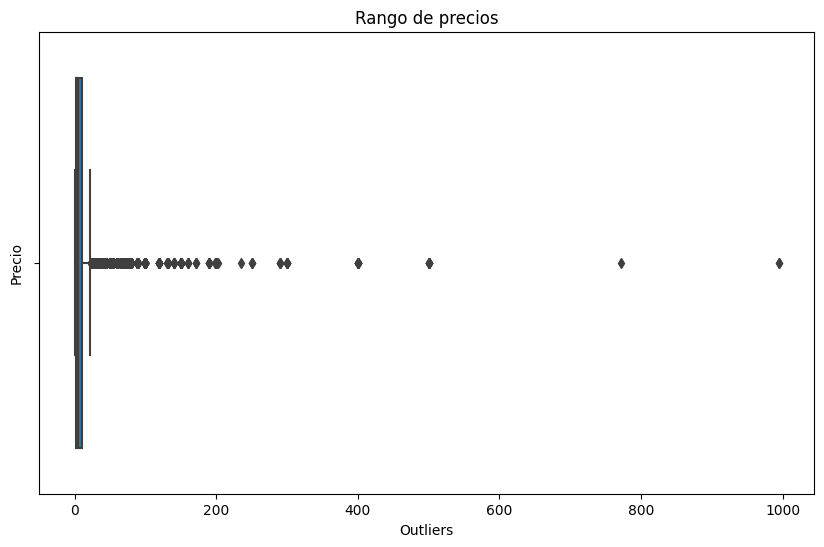

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df_games) # Creamos un boxplot sobre los precios
plt.ylabel('Precio')
plt.xlabel('Outliers')
plt.title('Rango de precios')


Vemos que tenemos algunos outliers, la mayoria de precios son menores de 20$

In [5]:
empresas = df_games['publisher'].value_counts().sort_values(ascending=False).to_dict() # Establecemos un conteo sobre las empresas
empresas = dict(list(empresas.items())[:10]) # Lo convertimos a diccionario


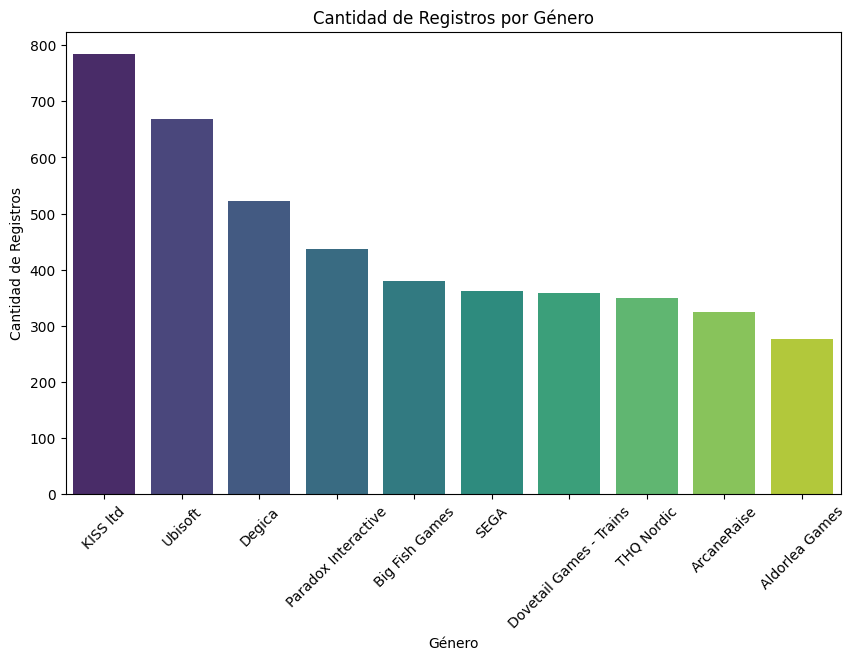

In [6]:
etiquetas = list(empresas.keys()) # Extraemos las etiquetas
valores = list(empresas.values()) # Extraemos los valores

plt.figure(figsize=(10, 6))
sns.barplot(x=etiquetas, y=valores, palette="viridis") # Creamos un barplot de juegos por empresas

plt.xlabel('Género')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Género')

plt.xticks(rotation=45) # Rotamos las etiquetas en X para que no se mezclen

# Muestra el gráfico
plt.show()


Vemos que los juegos se reparten, dentro de todo, de manera pareja en las primeras 10 empresas

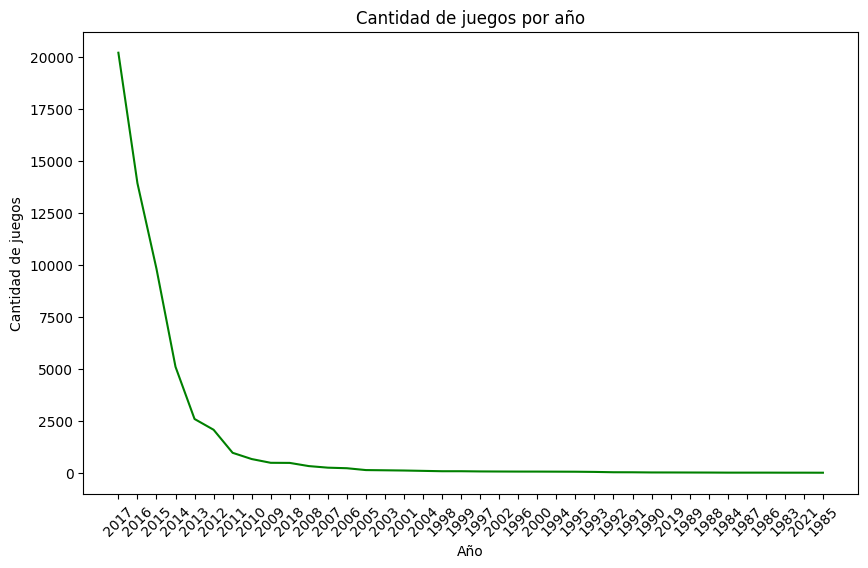

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(df_games['year'].value_counts(), color='green') # Creamos un lineplot sobre los juegos por año

plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.title('Cantidad de juegos por año')

plt.xticks(rotation=45) # Rotamos las etiquetas

# Muestra el gráfico
plt.show()


Vemos una tendencia en la actualidad, la mayoria de los juegos fueron lanzados desde el 2014 hasta el 2017

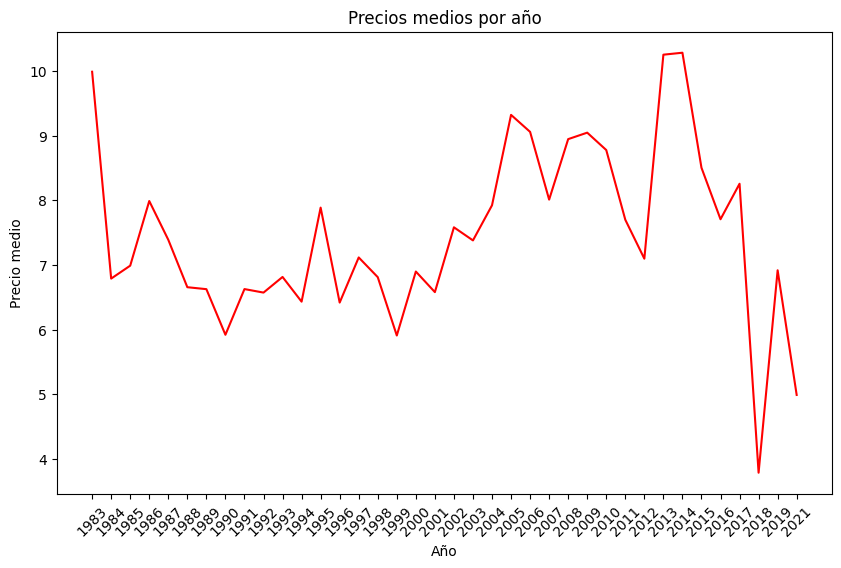

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(df_games.groupby('year')['price'].mean(), color="red") # Graficamos una linea sobre los precios medios por año de los juegos

plt.xlabel('Año')
plt.ylabel('Precio medio')
plt.title('Precios medios por año')

plt.xticks(rotation=45)

plt.show()


Vemos que el movimiento de precios es bastante volatil, no hay una tendencia tan variada Solo que podemos ver que en 1980 hubo un pico minimo de precios medios, y en 2012 hubo un pico maximo de precios medios.